<a href="https://colab.research.google.com/github/Student-NitinRaj/Machine-learning-PROJECT-HUB/blob/main/Resigned_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
df=pd.read_csv("https://github.com/harshita0911/employee_salary_prediction/raw/refs/heads/main/employee.csv.csv")
df.head(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [20]:
df.shape

(100000, 20)

In [21]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [22]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [24]:
df.tail()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False
99999,100000,Finance,Female,43,Analyst,2024-03-04 08:03:05.556036,0,PhD,1,4400.0,51,43,27,11,75,13,45,1,2.64,False


In [25]:
print(df.isnull().sum())

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [26]:
print(df.duplicated().sum())

0


In [27]:
df.sample(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
27561,27562,Marketing,Male,60,Technician,2019-06-02 08:03:05.556036,5,Master,1,3850.0,39,5,2,0,25,1,80,2,2.37,False
72486,72487,Operations,Male,28,Engineer,2021-11-21 08:03:05.556036,2,Bachelor,4,8400.0,34,21,24,4,0,18,39,1,1.84,True
82787,82788,Customer Support,Male,51,Consultant,2016-05-23 08:03:05.556036,8,Master,4,7700.0,49,45,28,8,75,2,20,0,4.05,False


In [28]:
print(df.Education_Level.value_counts())

Education_Level
Bachelor       50041
High School    30004
Master         14904
PhD             5051
Name: count, dtype: int64


In [29]:
print(df.Gender.value_counts())

Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64


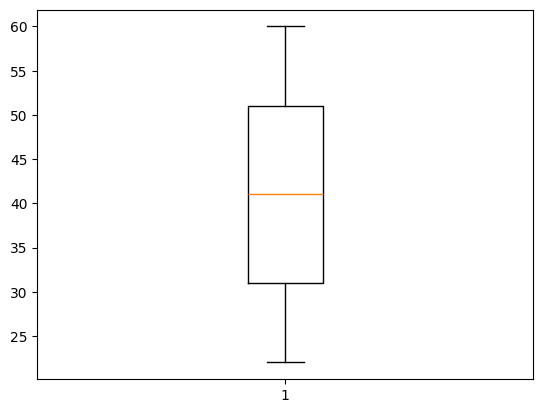

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(df["Age"])
plt.show()

In [31]:
df.sample(2)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
96662,96663,Legal,Male,24,Engineer,2022-08-31 08:03:05.556036,2,Bachelor,5,9000.0,51,41,5,12,75,5,44,1,2.04,False
19529,19530,HR,Male,34,Specialist,2015-05-26 08:03:05.556036,9,Bachelor,1,4950.0,35,22,8,13,50,19,80,0,3.51,False


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Department']=encoder.fit_transform(df['Department'])
df['Job_Title']=encoder.fit_transform(df['Job_Title'])
df['Education_Level']=encoder.fit_transform(df['Education_Level'])
df['Resigned']=encoder.fit_transform(df['Resigned'])
df['Age']=encoder.fit_transform(df['Age'])
df['Gender']=encoder.fit_transform(df['Gender'])
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,33,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,2,1,7,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,3,2,1,33,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,0,0,26,0,2016-10-22 08:03:05.556036,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,1,0,14,0,2021-07-23 08:03:05.556036,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,5,6,2022-12-07 08:03:05.556036,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28,0
99996,99997,4,0,14,1,2018-07-24 08:03:05.556036,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,7,1,31,0,2015-11-24 08:03:05.556036,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,3,0,0,1,2015-08-03 08:03:05.556036,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


In [33]:
x =df.drop(columns=["Resigned"])
y =df["Resigned"]

In [34]:
x

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,4,1,33,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,2,1,7,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,2,1,33,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,0,0,26,0,2016-10-22 08:03:05.556036,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,1,0,14,0,2021-07-23 08:03:05.556036,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,5,6,2022-12-07 08:03:05.556036,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28
99996,99997,4,0,14,1,2018-07-24 08:03:05.556036,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48
99997,99998,7,1,31,0,2015-11-24 08:03:05.556036,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60
99998,99999,3,0,0,1,2015-08-03 08:03:05.556036,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10


In [35]:
y

,Resigned
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,1
99997,0
99998,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() # all data convert randge 0 to 1
x = x.drop(columns=['Hire_Date'])
x=scaler.fit_transform(x) #x is input
x

array([[0.00000000e+00, 5.00000000e-01, 5.00000000e-01, ...,
        6.66666667e-01, 0.00000000e+00, 4.07500000e-01],
       [1.00001000e-05, 2.50000000e-01, 5.00000000e-01, ...,
        6.16161616e-01, 1.00000000e+00, 1.80000000e-01],
       [2.00002000e-05, 2.50000000e-01, 5.00000000e-01, ...,
        1.01010101e-02, 0.00000000e+00, 5.42500000e-01],
       ...,
       [9.99980000e-01, 8.75000000e-01, 5.00000000e-01, ...,
        8.78787879e-01, 5.00000000e-01, 4.00000000e-01],
       [9.99990000e-01, 3.75000000e-01, 0.00000000e+00, ...,
        3.13131313e-01, 5.00000000e-01, 5.25000000e-01],
       [1.00000000e+00, 2.50000000e-01, 0.00000000e+00, ...,
        4.54545455e-01, 5.00000000e-01, 4.10000000e-01]])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23, stratify=y)

In [38]:
x_train

array([[0.0101201 , 0.5       , 0.        , ..., 0.87878788, 0.5       ,
        0.8725    ],
       [0.61524615, 0.625     , 0.5       , ..., 0.92929293, 1.        ,
        0.9675    ],
       [0.88236882, 0.375     , 0.5       , ..., 0.94949495, 0.        ,
        0.2875    ],
       ...,
       [0.4099141 , 0.75      , 0.        , ..., 0.67676768, 1.        ,
        0.6675    ],
       [0.45147451, 0.75      , 0.        , ..., 0.44444444, 1.        ,
        0.445     ],
       [0.47602476, 0.375     , 0.5       , ..., 0.17171717, 0.5       ,
        0.97      ]])

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.89275

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predict1=lr.predict(x_test)                                                # picture to predict sad or happy
predict1

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict1)

0.8999

In [45]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver="adam", hidden_layer_sizes=(5,2), random_state=2, max_iter=2000)
clf.fit(x_train,y_train)
predict2=clf.predict(x_test)
predict2

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict2)

0.8999

In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))